# Tutorial 2: resolution of Poisson problem and usage of extra-features

### The problem definition

After the problem, the feed-forward neural network is defined, through the class `FeedForward`. This neural network takes as input the coordinates (in this case $x$ and $y$) and provides the unkwown field of the Poisson problem. The residual of the equations are evaluated at several sampling points (which the user can manipulate using the method `span_pts`) and the loss minimized by the neural network is the sum of the residuals.

In this tutorial, the neural network is composed by two hidden layers of 10 neurons each, and it is trained for 1000 epochs with a learning rate of 0.006. These parameters can be modified as desired.
The output of the cell below is the final loss of the training phase of the PINN.
We highlight that the generation of the sampling points and the train is here encapsulated within the function `generate_samples_and_train`, but only for saving some lines of code in the next cells; that function is not mandatory in the **PINA** framework. 

### The problem solution 

This tutorial presents how to solve with Physics-Informed Neural Networks for a 2D Poisson problem with Dirichlet boundary conditions.

The problem is written as:
\begin{equation}
\begin{cases}
-\Delta u = -\pi^2\sin{(\pi x)} \sin{(\pi y)} \text{ in } D, \\
u = 0 \text{ on } \Gamma_1 \cup \Gamma_2 \cup \Gamma_3 \cup \Gamma_4,
\end{cases}
\end{equation}
where $D$ is a square domain $[0,1]^2$, and $\Gamma_i$, with $i=1,...,4$, are the boundaries of the square.

In [1]:
import numpy as np
import torch
from torch.nn import Tanh


from problem.pinn import PINN
from model.feed_forward import FeedForward
from problem.plotter import Plotter

from model.feed_forward import FeedForward
from poisson import Poisson

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

problem = Poisson()
model = FeedForward(
    layers=[64, 64, 64, 64],
    func=Tanh,
    output_variables=problem.output_variables,
    input_variables=problem.input_variables
)

pinn = PINN(
    problem,
    model,
    lr=0.001,
    error_norm='mse',
    regularizer=1e-8, 
    device=device,
    )



In [3]:
pinn.span_pts(n=20, mode='grid', locations=['gamma1', 'gamma2', 'gamma3', 'gamma4'])
pinn.span_pts(n=20, mode='grid', locations=['D'])

pinn.train(5000, 100)
# pinn.save_state('pina.poisson')

              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00000] 5.154406e-02 4.831988e-03 1.598487e-03 4.416111e-03 6.051908e-04 4.009228e-02 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00001] 8.037670e-02 1.896605e-02 7.053646e-03 1.751275e-02 8.195342e-03 2.864891e-02 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00100] 3.779689e-03 1.911512e-04 8.318171e-05 5.041050e-04 2.402940e-04 2.760957e-03 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00200] 1.749833e-03 5.964595e-05 3.299892e-05 8.324585e-05 5.776111e-05 1.516181e-03 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamma4nil_di Dlaplace_equ 
[epoch 00300] 1.496965e-03 3.291279e-05 1.268171e-04 1.936862e-04 2.249272e-04 9.186217e-04 
              sum          gamma1nil_di gamma2nil_di gamma3nil_di gamm

0.017875714227557182

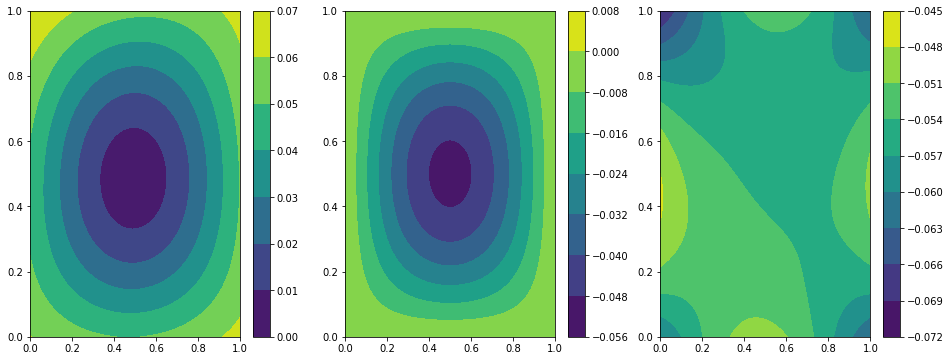

In [4]:
plotter = Plotter()
plotter.plot(pinn)